In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
import random
import time

# Inside the /Multimodal-Deep-Regression/notebooks
import sys
sys.path.append("..")

from util.utilities import train, evaluate, get_device
from util.data_utilities import get_base_tensor_directories, generate_batch, get_train_and_val_loader

# import all the models from models module
from models import CNN3D

In [2]:
# Current Path
os.getcwd()

'c:\\Users\\ahmed\\Documents\\DeepLearningSummer\\Multimodal-Deep-Regression\\notebooks'

In [3]:
device = get_device()
train_loader, val_loader = get_train_and_val_loader(
    input_type='video_pack_1000',
    batch_size=1,
    verbose=True,
    tensor_upper_limit=95
)

You are using device: cuda
torch.Size([3, 100, 1024, 576])
torch.Size([3, 100, 1024, 576])
76
19


In [4]:
model = CNN3D()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())#, lr=0.01)
model = model.to(device)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")

EPOCHS = 30

train_losses = []
val_losses = []

input_verbose = False


Total parameters: 9,438,497


In [5]:
start_time = time.time()

for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer, device, verbose=input_verbose)
    val_loss, avg_val_loss = evaluate(model, val_loader, criterion, device, verbose=input_verbose)
    
    # record the losses
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}; Val_Loss: {val_loss:.2f}, Avg: {avg_val_loss:.2f}')


First epoch took 21.5 minutes.
Epoch 1/30, Train_Loss: 48972165018.45, Avg: 644370592.35; Val_Loss: 2327753194.26, Avg: 122513326.01
Epoch 2/30, Train_Loss: 39088504958.35, Avg: 514322433.66; Val_Loss: 2338036503.29, Avg: 123054552.80
Epoch 3/30, Train_Loss: 37657476283.43, Avg: 495493108.99; Val_Loss: 2293500536.61, Avg: 120710554.56
Epoch 4/30, Train_Loss: 36465620078.38, Avg: 479810790.50; Val_Loss: 2136579405.02, Avg: 112451547.63
Epoch 5/30, Train_Loss: 36044475759.16, Avg: 474269417.88; Val_Loss: 2110926335.41, Avg: 111101386.07
Epoch 6/30, Train_Loss: 40411835788.27, Avg: 531734681.42; Val_Loss: 2289139791.67, Avg: 120481041.67
Epoch 7/30, Train_Loss: 37097642629.79, Avg: 488126876.71; Val_Loss: 2033453592.01, Avg: 107023873.26
Epoch 8/30, Train_Loss: 35638777183.09, Avg: 468931278.72; Val_Loss: 2252067396.96, Avg: 118529863.00
Epoch 9/30, Train_Loss: 35803116520.16, Avg: 471093638.42; Val_Loss: 2191940686.31, Avg: 115365299.28
Epoch 10/30, Train_Loss: 42106737196.98, Avg: 55403

In [6]:
# save model if better or not exists
model_weights = {'model_state_dict': model.state_dict(), 'val_loss': avg_val_loss}
weights_file = '../models/save/CNN_weights.pt'
if not os.path.isfile(weights_file):
    # save new
    torch.save(model_weights, weights_file)
elif model_weights['val_loss'] < torch.load(weights_file)['val_loss']:
    # replace
    torch.save(model_weights, weights_file)

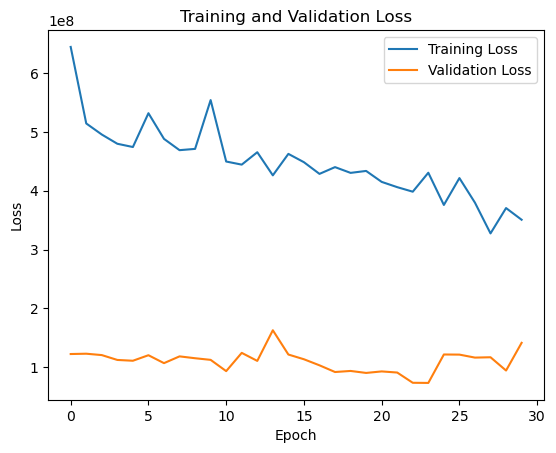

In [7]:
import matplotlib.pyplot as plt

# lost plot
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [8]:
# compare to validation set
val_values = []
predicted_values = []

for inputs, targets in val_loader:
    inputs, targets = inputs.to(torch.float32).to(device), targets.to(torch.float32).to(device)

    # Forward pass
    outputs = model(inputs)

    # Append the values
    val_values.extend(targets.tolist())
    predicted_values.extend(outputs.tolist())

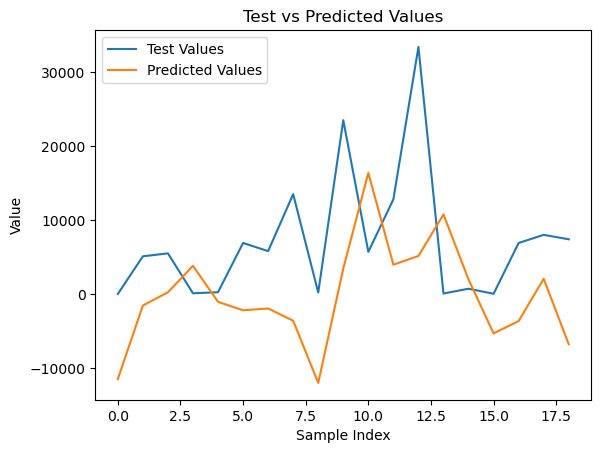

In [9]:
import matplotlib.pyplot as plt

plt.plot(val_values, label='Test Values')
plt.plot(predicted_values, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Test vs Predicted Values')
plt.legend()
plt.show()

In [10]:
val_values, predicted_values

([10.600000381469727,
  5100.0,
  5500.0,
  100.69999694824219,
  250.5,
  6904.0,
  5800.0,
  13500.0,
  204.8000030517578,
  23500.0,
  5700.0,
  12800.0,
  33400.0,
  69.0,
  720.5999755859375,
  36.900001525878906,
  6900.0,
  8000.0,
  7400.0],
 [[-11483.6533203125],
  [-1551.304931640625],
  [240.27764892578125],
  [3818.760009765625],
  [-1056.2745361328125],
  [-2193.3720703125],
  [-1950.5823974609375],
  [-3606.498779296875],
  [-12012.1689453125],
  [3439.58740234375],
  [16371.3681640625],
  [3966.48681640625],
  [5148.4033203125],
  [10760.107421875],
  [1970.9561767578125],
  [-5312.59912109375],
  [-3654.86328125],
  [2065.702880859375],
  [-6783.99169921875]])